Лабораторная №2

# Подготовка к работе

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Описание полей

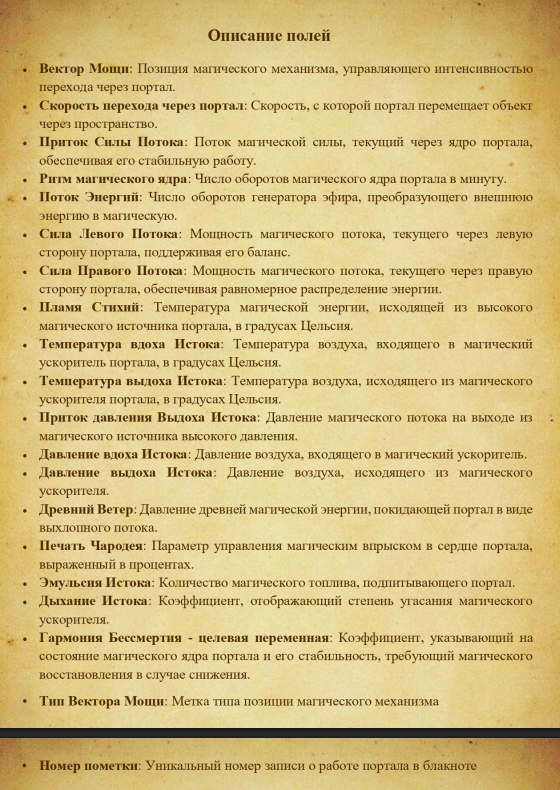




Загружаем датасет с данными о портальной деятельности

In [125]:
data = pd.read_csv('C:/tubaduba/practicum/data/portal_data.csv',encoding='cp1251',sep='|')

Датасет загружен, задача - регрессия, поскольку предсказываем признак Гармония Бессмертия

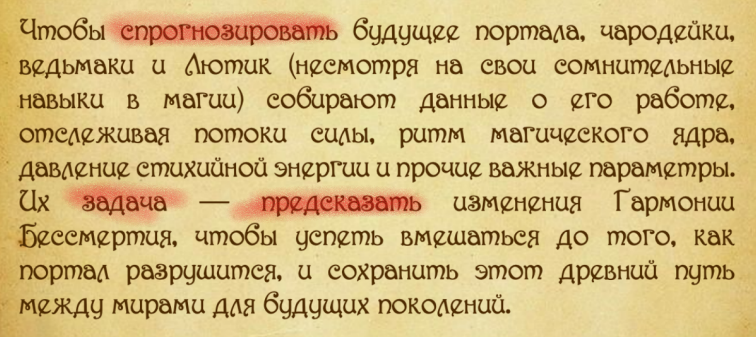

Согласно описанию признаков, определяем типы данных. Большинство здесь - физические величины, которые выражаются каким-нибудь числом, иногда с единицами измерения (могут понадобиться при добавлении или объединении признаков). Стоит отметить, что все, кроме двух признаков - вещественные. Это категориальный тип вектора мощи и целочисленный номер пометки



| **№** | Признак | Описание | Тип |
|---|---|---|---|
| | **Целевые признаки** | | |
| **1** | `Гармония Бессмертия` | Коэффициент, указывающий на состояние магического ядра портала и его стабильность | Вещественный(0;1) |
| | **Входные признаки** | | |
| **2** | `Вектор Мощи` | Позиция магического механизма, управляющего интенсивностью перехода через портал | Вещественный |
| **3** | `Скорость перехода через портал` | Скорость, с которой портал перемещает объект через пространство | Вещественный |
| **4** | `Приток Силы Потока` | Поток магической силы, текущий через ядро портала, обеспечивая стабильную работу | Вещественный |
| **5** | `Ритм магического ядра` | Число оборотов магического ядра портала в минуту | Вещественный |
| **6** | `Поток Энергий` | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую | Вещественный |
| **7** | `Сила Левого Потока` | Мощность магического потока, текущего через левую сторону портала | Вещественный |
| **8** | `Сила Правого Потока` | Мощность магического потока, текущего через правую сторону портала | Вещественный |
| **9** | `Пламя Стихий` | Температура магической энергии, исходящей из высокого магического источника портала (°C) | Вещественный |
| **10** | `Температура вдоха Истока` | Температура воздуха, входящего в магический ускоритель портала (°C) | Вещественный |
| **11** | `Температура выдоха Истока` | Температура воздуха, исходящего из магического ускорителя портала (°C) | Вещественный |
| **12** | `Приток давления Выдоха Истока` | Давление магического потока на выходе из магического источника высокого давления | Вещественный |
| **13** | `Давление вдоха Истока` | Давление воздуха, входящего в магический ускоритель | Вещественный |
| **14** | `Давление выдоха Истока` | Давление воздуха, исходящего из магического ускорителя | Вещественный |
| **15** | `Древний Ветер` | Давление древней магической энергии, покидающей портал в виде выхлопного потока | Вещественный |
| **16** | `Печать Чародея` | Параметр управления магическим выбросом в сердце портала (%) | Вещественный(0;100) |
| **17** | `Эмульсия Истока` | Количество магического топлива, подпитывающего портал | Вещественный |
| **18** | `Дыхание Истока` | Коэффициент, отображающий степень угасания магического ускорителя | Вещественный |
| **19** | `Тип Вектора Мощи` | Метка типа позиции магического механизма | Категориальный |
| **20** | `Номер пометки` | Уникальный номер записи о работе портала | Целочисленный |

Номер пометки можно спокойно удалять - это просто индексы

In [126]:
data = data.drop(columns=['Номер пометки'])

Тип вектора мощи можно если что привести к численному значению (слабый - 1, средний - 2 и тд или как-то по-другому), но пока не буду

# Обработка данных

Сперва выведем некоторую информацию, чтобы удостовериться в правильности типов данных

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

Видим, что Скорость перехода через портал, Температура вдоха Истока, Температура выдоха Истока, Давление вдоха Истока и Древний Ветер имеют неверный тип данных

Для Температуры вдоха Истока достаточно поменять тип даннных с целочисленного на вещественный, просто чтобы совпадало с другими признаками температуры



In [128]:
data["Температура вдоха Истока"] = data["Температура вдоха Истока"].astype("float64")

Для решения проблем с другими признаками выведем часть таблицы

In [129]:
data.head()

Вектор Мощи Скорость перехода через портал  Приток Силы Потока  \
0        1.138                        1.54332             289.964   
1        2.088                              -            6960.180   
2        3.144             4.6299600000000005            8379.229   
3        4.161                        6.17328           14724.395   
4        5.140                         7.7166           21636.432   

   Ритм магического ядра  Поток Энергий  Сила Левого Потока  \
0             141.318158       6677.380               7.584   
1             144.111767       6828.469              28.204   
2             145.220853       7111.811              60.358   
3             162.050156       7792.630             113.774   
4             201.513586       8494.777             175.306   

   Сила Правого Потока  Пламя Стихий  Температура вдоха Истока  \
0                7.584       464.006                     736.0   
1               28.204       635.401                     736.0   
2               60.358       606.002                     736.0   
3              113.774       661.471                     736.0   
4              175.306       731.494                     736.0   

  Температура выдоха Истока  Приток давления Выдоха Истока  \
0                         -                          1.096   
1                   581.658                          1.331   
2                         -                          1.389   
3                         -                          1.658   
4                   645.642                          2.078   

  Давление вдоха Истока  Давление выдоха Истока Древний Ветер  Печать Чародея  \
0         Не определено                   5.947             -           7.137   
1              1.394603                   7.282         1.019          10.655   
2         Не определено                   7.574             -          13.086   
3         Не определено                   9.007             -          18.109   
4         Не определено                  11.197         1.026          26.373   

   Эмульсия Истока  Дыхание Истока  Гармония Бессмертия Тип Вектора Мощи  
0            0.082            0.95                0.975           Слабый  
1            0.287            0.95                0.975           Слабый  
2            0.259            0.95                0.975    Ниже среднего  
3            0.358            0.95                0.975    Ниже среднего  
4            0.522            0.95                0.975    Выше среднего

Также заметим, что сила левого потока и сила правого потока абсолютно идентичны:

In [130]:
float((data['Сила Левого Потока'] == data['Сила Правого Потока']).sum() / len(data) * 100)

100.0

Двое заходят - один выходит!

In [131]:
data['Сила полного Потока'] = data['Сила Левого Потока'] + data['Сила Правого Потока']
data = data.drop(['Сила Левого Потока', 'Сила Правого Потока'], axis=1)

Видим, что у остальных признаков неправильно заполнены пропуски, чтобы поменять тип данных пока что заменим пропуски на NaN

In [132]:
for pryznac in ["Скорость перехода через портал","Температура выдоха Истока","Давление вдоха Истока","Древний Ветер"]:
    data[pryznac] = pd.to_numeric(data[pryznac], errors='coerce')

Проверим еще раз и убедимся что все правильно

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Пламя Стихий                    11934 non-null  float64
 6   Температура вдоха Истока        11934 non-null  float64
 7   Температура выдоха Истока       2387 non-null   float64
 8   Приток давления Выдоха Истока   11934 non-null  float64
 9   Давление вдоха Истока           2439 non-null   float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Древний Ветер                   2387 non-null   float64
 12  Печать Чародея                  

Продолжим анализ с пропусков: выше где был вывод общей информации есть счетчик ненулевых значений.


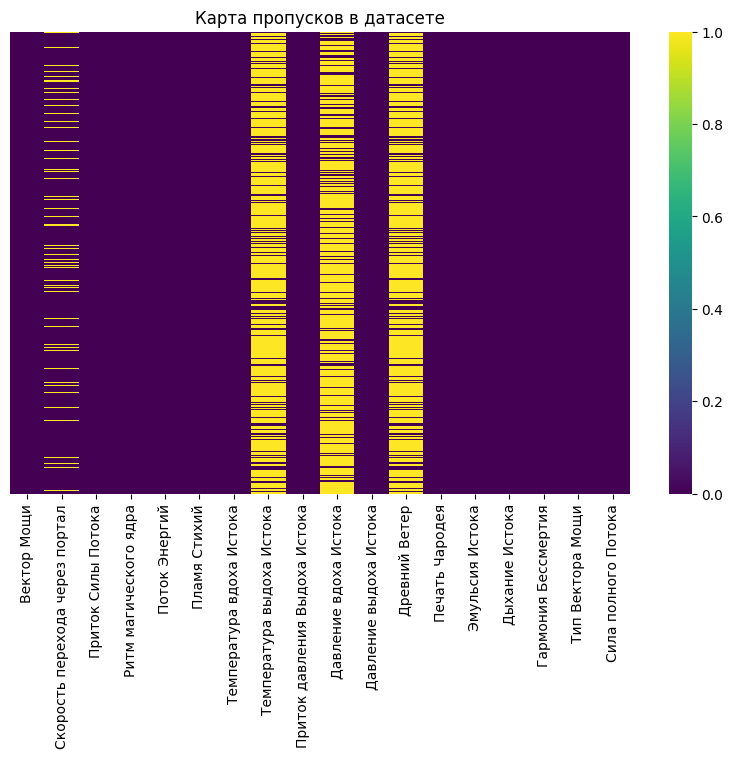

In [134]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Карта пропусков в датасете')
plt.show()


Для большинства признаков все значения на месте (11934 из 11934), для Скорости перехода через портал имеется около тысячи пропущенных значений (~10%), которые позже можно заполнить.

Также есть три признака, в которых отсутствует около 80% значений, мы эти признаки пожалуй выкинем.

In [135]:
data = data.drop(columns=['Температура выдоха Истока','Давление вдоха Истока','Древний Ветер'])

Выделим целевой признак

In [136]:

target_column = 'Гармония Бессмертия'
X = data.drop(columns=[target_column])
y = pd.DataFrame(data[target_column])

Разобьем на обучающую и тестовую выборки


80/20 - стандартное соотношение, обеспечивающее достаточное количество данных для обучения

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
print(f"Обучающая: {X_train.shape}, {y_train.shape}")
print(f"Тестовая: {X_test.shape}, {y_test.shape}")

Обучающая: (9547, 14), (9547, 1)
Тестовая: (2387, 14), (2387, 1)


Лабораторная №3

# Кодировка категориальных признаков 


Рассмотрим единственный категориальный признак в нашем датасете: Тип вектора мощи

In [139]:
X_train['Тип Вектора Мощи'].value_counts(normalize=True) * 100

Тип Вектора Мощи
Сильный          33.392689
Ниже среднего    22.268776
Слабый           22.237352
Выше среднего    22.101184
Name: proportion, dtype: float64

In [140]:
X_test['Тип Вектора Мощи'].value_counts(normalize=True) * 100

Тип Вектора Мощи
Сильный          33.095936
Выше среднего    22.706326
Слабый           22.161709
Ниже среднего    22.036028
Name: proportion, dtype: float64

Слабый, ниже среднего, выше среднего, сильный - в таком порядке заменим на 1, 2, 3, 4

In [141]:
from sklearn.preprocessing import LabelEncoder


In [142]:
le = LabelEncoder()
X_train['Тип Вектора Мощи'] = le.fit_transform(X_train['Тип Вектора Мощи']) + 1
X_test['Тип Вектора Мощи'] = le.fit_transform(X_test['Тип Вектора Мощи']) + 1

In [143]:
X_train['Тип Вектора Мощи']

352      4
4452     3
7551     4
666      4
956      2
        ..
10977    3
7503     3
668      2
11472    3
4535     3
Name: Тип Вектора Мощи, Length: 9547, dtype: int64

In [144]:
X_train['Тип Вектора Мощи'].value_counts(normalize=True) * 100

Тип Вектора Мощи
3    33.392689
2    22.268776
4    22.237352
1    22.101184
Name: proportion, dtype: float64

# Обработка пропущенных значений

Остался один признак с пропусками, нужно с ним разбираться

для обучающей

In [145]:
print(f"Тренировочные данные:")
print(f"Всего строк: {len(X_train)}")
print(f"Ненулевых значений: {X_train['Скорость перехода через портал'].notna().sum()}")
print(f"Пропусков: {X_train['Скорость перехода через портал'].isna().sum()}")
print(f"Доля пропусков: {X_train['Скорость перехода через портал'].isna().mean():.2%}")

Тренировочные данные:
Всего строк: 9547
Ненулевых значений: 8588
Пропусков: 959
Доля пропусков: 10.05%


для тестовой

In [146]:
print(f"Тренировочные данные:")
print(f"Всего строк: {len(X_test)}")
print(f"Ненулевых значений: {X_test['Скорость перехода через портал'].notna().sum()}")
print(f"Пропусков: {X_test['Скорость перехода через портал'].isna().sum()}")
print(f"Доля пропусков: {X_test['Скорость перехода через портал'].isna().mean():.2%}")

Тренировочные данные:
Всего строк: 2387
Ненулевых значений: 2143
Пропусков: 244
Доля пропусков: 10.22%


для всего датасета

In [147]:
print(f"Тренировочные данные:")
print(f"Всего строк: {len(data)}")
print(f"Ненулевых значений: {data['Скорость перехода через портал'].notna().sum()}")
print(f"Пропусков: {data['Скорость перехода через портал'].isna().sum()}")
print(f"Доля пропусков: {data['Скорость перехода через портал'].isna().mean():.2%}")

Тренировочные данные:
Всего строк: 11934
Ненулевых значений: 10731
Пропусков: 1203
Доля пропусков: 10.08%


Доля пропусков у выборок такая же, как в основном датасете

### Статистический подход с KL-дивергенцией

In [148]:
from scipy.special import rel_entr

In [149]:
def calculate_kl_divergence(original, imputed):
    min_val = min(original.min(), imputed.min())
    max_val = max(original.max(), imputed.max())
    bins = np.linspace(min_val, max_val, 50)
    
    hist_orig, _ = np.histogram(original, bins=bins, density=True)
    hist_imp, _ = np.histogram(imputed, bins=bins, density=True)
    
    hist_orig = hist_orig + 1e-10
    hist_imp = hist_imp + 1e-10
    
    hist_orig = hist_orig / hist_orig.sum()
    hist_imp = hist_imp / hist_imp.sum()
    
    kl_div = rel_entr(hist_orig, hist_imp).sum()
    
    return kl_div, hist_orig, hist_imp, bins

def statistical_imputation_with_kl(train_data, test_data, column_name):
    train_series = train_data[column_name].copy()
    
    existing_values = train_series.dropna()
    
    candidates = {
        'mean': existing_values.mean(),
        'median': existing_values.median(),
        'mode': existing_values.mode()[0] if not existing_values.mode().empty else existing_values.median(),
        'min': existing_values.min(),
        'max': existing_values.max(),
        'zero': 0
    }
    
    kl_results = {}
    histograms = {}
    
    plt.figure(figsize=(15, 10))
    
    for i, (method, value) in enumerate(candidates.items(), 1):
        imputed_series = train_series.copy()
        imputed_series.fillna(value, inplace=True)
        
        kl_div, hist_orig, hist_imp, bins = calculate_kl_divergence(
            existing_values.values, 
            imputed_series.values
        )
        
        kl_results[method] = kl_div
        histograms[method] = (hist_orig, hist_imp, bins)
        
        plt.subplot(2, 3, i)
        plt.hist(existing_values.values, bins=bins, alpha=0.5, density=True, label='Оригинал', color='blue')
        plt.hist(imputed_series.values, bins=bins, alpha=0.5, density=True, label=f'Импутация ({method})', color='red')
        plt.title(f'{method} (KL={kl_div:.4f})')
        plt.xlabel('Значение')
        plt.ylabel('Плотность')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    best_method = min(kl_results, key=kl_results.get)
    best_value = candidates[best_method]
    
    print("Результаты KL-дивергенции:")
    for method, kl in kl_results.items():
        print(f"  {method}: {kl:.6f}")
    print(f"\nЛучший метод: {best_method} со значением {best_value:.2f}")
    
    train_imputed = train_data.copy()
    train_imputed[column_name] = train_series.fillna(best_value)
    
    test_imputed = test_data.copy()
    test_imputed[column_name] = test_data[column_name].fillna(best_value)
    
    return train_imputed, test_imputed, best_method, best_value, kl_results



для каждой кандидатуры для подстановки на пустые места высчитываются характеристик, конкрентно тут - KL-дивергенция, чем ближе она к нулю, тем больше подходит кандидатура.

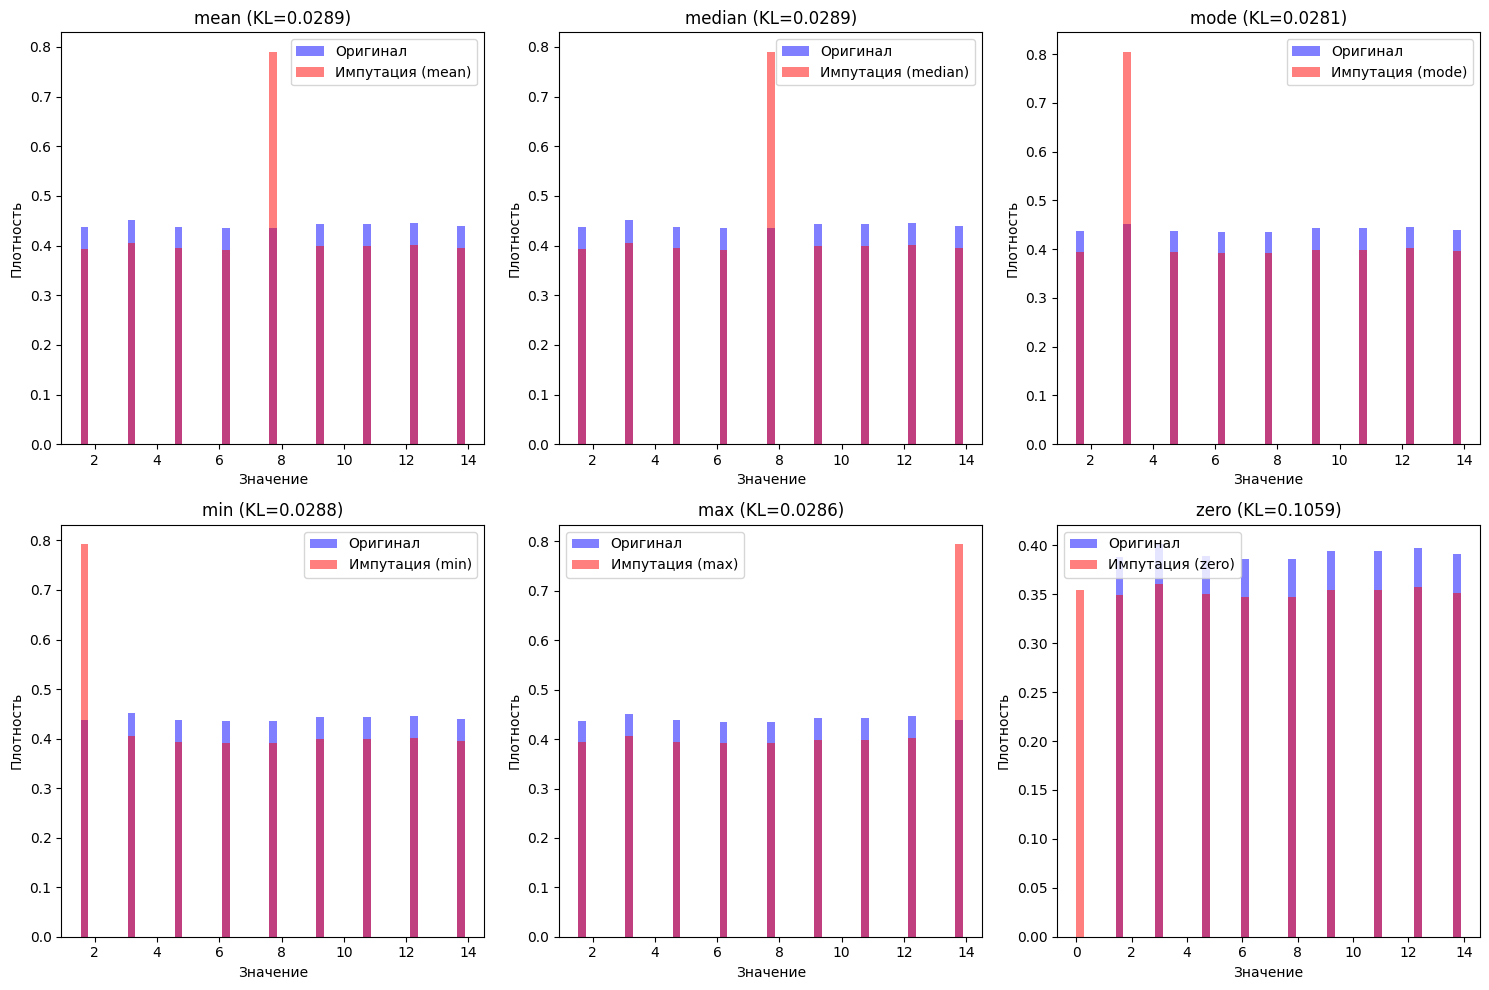

Результаты KL-дивергенции:
  mean: 0.028869
  median: 0.028869
  mode: 0.028081
  min: 0.028754
  max: 0.028640
  zero: 0.105861

Лучший метод: mode со значением 3.09


In [150]:
train_stat, test_stat, best_method, best_value, kl_results = statistical_imputation_with_kl(
    X_train, X_test, 'Скорость перехода через портал'
)

По итогу лучшим значением является мода (красное - плотность после заполнения, синее - ориг без нулей, фиолетолвое - пересечение красного и синего)

### Машинные подходы для импутации

In [151]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

тут расчитывается машинным методом как лучше заполнить

In [152]:
def machine_learning_imputation(train_data, test_data, column_name, method='iterative'):
    train_imputed = train_data.copy()
    test_imputed = test_data.copy()
    
    numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
    
    if column_name in numeric_cols:
        numeric_cols.remove(column_name)
    
    X_train = train_data[numeric_cols + [column_name]].copy()
    X_test = test_data[numeric_cols + [column_name]].copy()
    
    if method == 'iterative':
        imputer = IterativeImputer(
            max_iter=10,
            random_state=42,
            n_nearest_features=min(5, len(numeric_cols))
        )
    elif method == 'knn':
        imputer = KNNImputer(n_neighbors=5)
    else:
        raise ValueError("Метод должен быть 'iterative' или 'knn'")
    
    X_train_imputed = imputer.fit_transform(X_train)
    
    train_imputed[column_name] = X_train_imputed[:, -1]
    
    X_test_imputed = imputer.transform(X_test)
    test_imputed[column_name] = X_test_imputed[:, -1]
    
    return train_imputed, test_imputed

train_iterative, test_iterative = machine_learning_imputation(
    X_train, X_test, 'Скорость перехода через портал', method='iterative'
)

train_knn, test_knn = machine_learning_imputation(
    X_train, X_test, 'Скорость перехода через портал', method='knn'
)

здесь уже сравнение статистического с машинными


Статистический:
  Среднее: 7.26
  Медиана: 7.72
  Стандартное отклонение: 4.03
  Минимум: 1.54
  Максимум: 13.89

IterativeImputer:
  Среднее: 7.72
  Медиана: 7.72
  Стандартное отклонение: 3.98
  Минимум: 1.54
  Максимум: 13.91

KNNImputer:
  Среднее: 7.72
  Медиана: 7.72
  Стандартное отклонение: 3.98
  Минимум: 1.54
  Максимум: 13.89


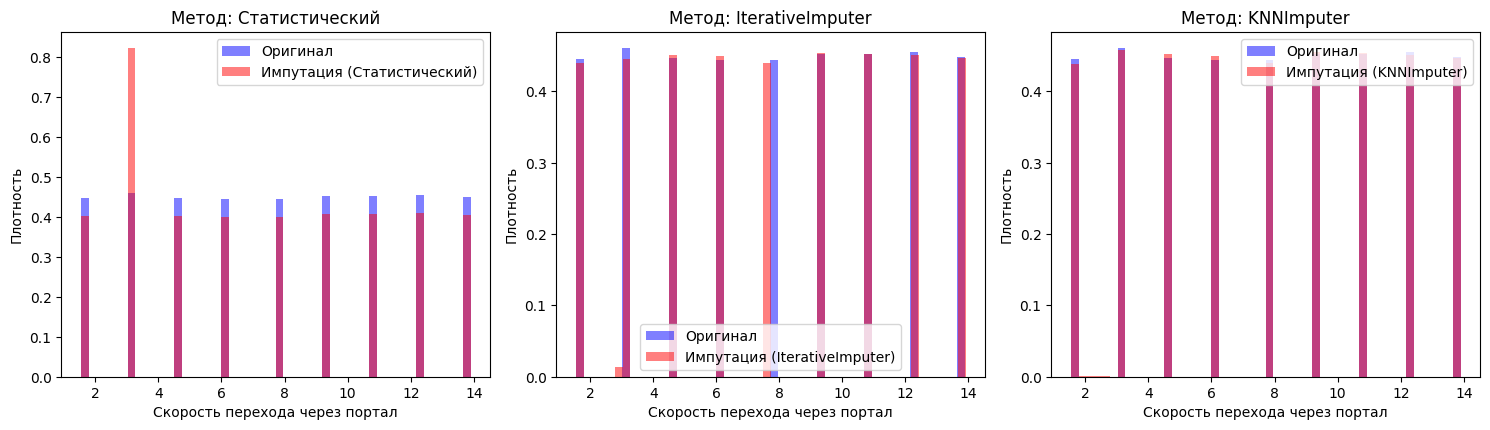

In [153]:
def compare_imputation_methods(original_train, methods_dict, column_name):
    original_non_null = original_train[column_name].dropna()
    
    plt.figure(figsize=(15, 8))
    
    for i, (method, imputed_data) in enumerate(methods_dict.items(), 1):
        imputed_values = imputed_data[column_name]
        
        plt.subplot(2, 3, i)
        plt.hist(original_non_null.values, bins=50, alpha=0.5, density=True, label='Оригинал', color='blue')
        plt.hist(imputed_values.values, bins=50, alpha=0.5, density=True, label=f'Импутация ({method})', color='red')
        plt.title(f'Метод: {method}')
        plt.xlabel(column_name)
        plt.ylabel('Плотность')
        plt.legend()
        
        print(f"\n{method}:")
        print(f"  Среднее: {imputed_values.mean():.2f}")
        print(f"  Медиана: {imputed_values.median():.2f}")
        print(f"  Стандартное отклонение: {imputed_values.std():.2f}")
        print(f"  Минимум: {imputed_values.min():.2f}")
        print(f"  Максимум: {imputed_values.max():.2f}")
    
    plt.tight_layout()
    plt.show()

methods_comparison = {
    'Статистический': train_stat,
    'IterativeImputer': train_iterative,
    'KNNImputer': train_knn
}

compare_imputation_methods(X_train, methods_comparison, 'Скорость перехода через портал')

по идее чем больше фиолетового и меньше синего да красного, тем лучше, но в IterativeImputer что-то пошло не так - значения чуточку сммещены то туда, то сюда, причем даже фиолетовые столбцы не все идеальны и чуть чуть синего или красного выступает туда сюда

По итогу, лучще всего показывает себя KNNImputer

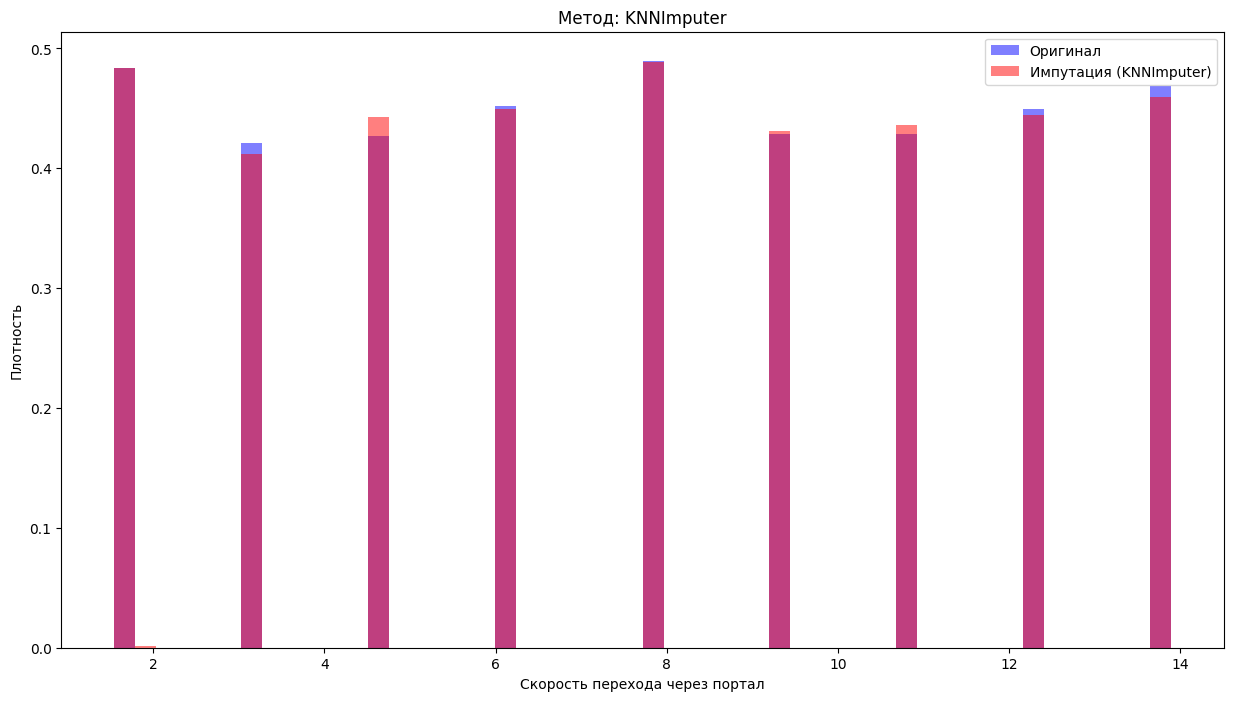

In [154]:
original_non_null = X_test['Скорость перехода через портал'].dropna()
plt.figure(figsize=(15, 8))

plt.hist(original_non_null.values, bins=50, alpha=0.5, density=True, label='Оригинал', color='blue')
plt.hist(test_knn['Скорость перехода через портал'].values, bins=50, alpha=0.5, density=True, label=f'Импутация (KNNImputer)', color='red')
plt.title(f'Метод: KNNImputer')
plt.xlabel('Скорость перехода через портал')
plt.ylabel('Плотность')
plt.legend()


Лабораторная номер 3

 поиск выбросов при помощи методов IQR и Robust Z-score


Гистограммы распределений признаков:


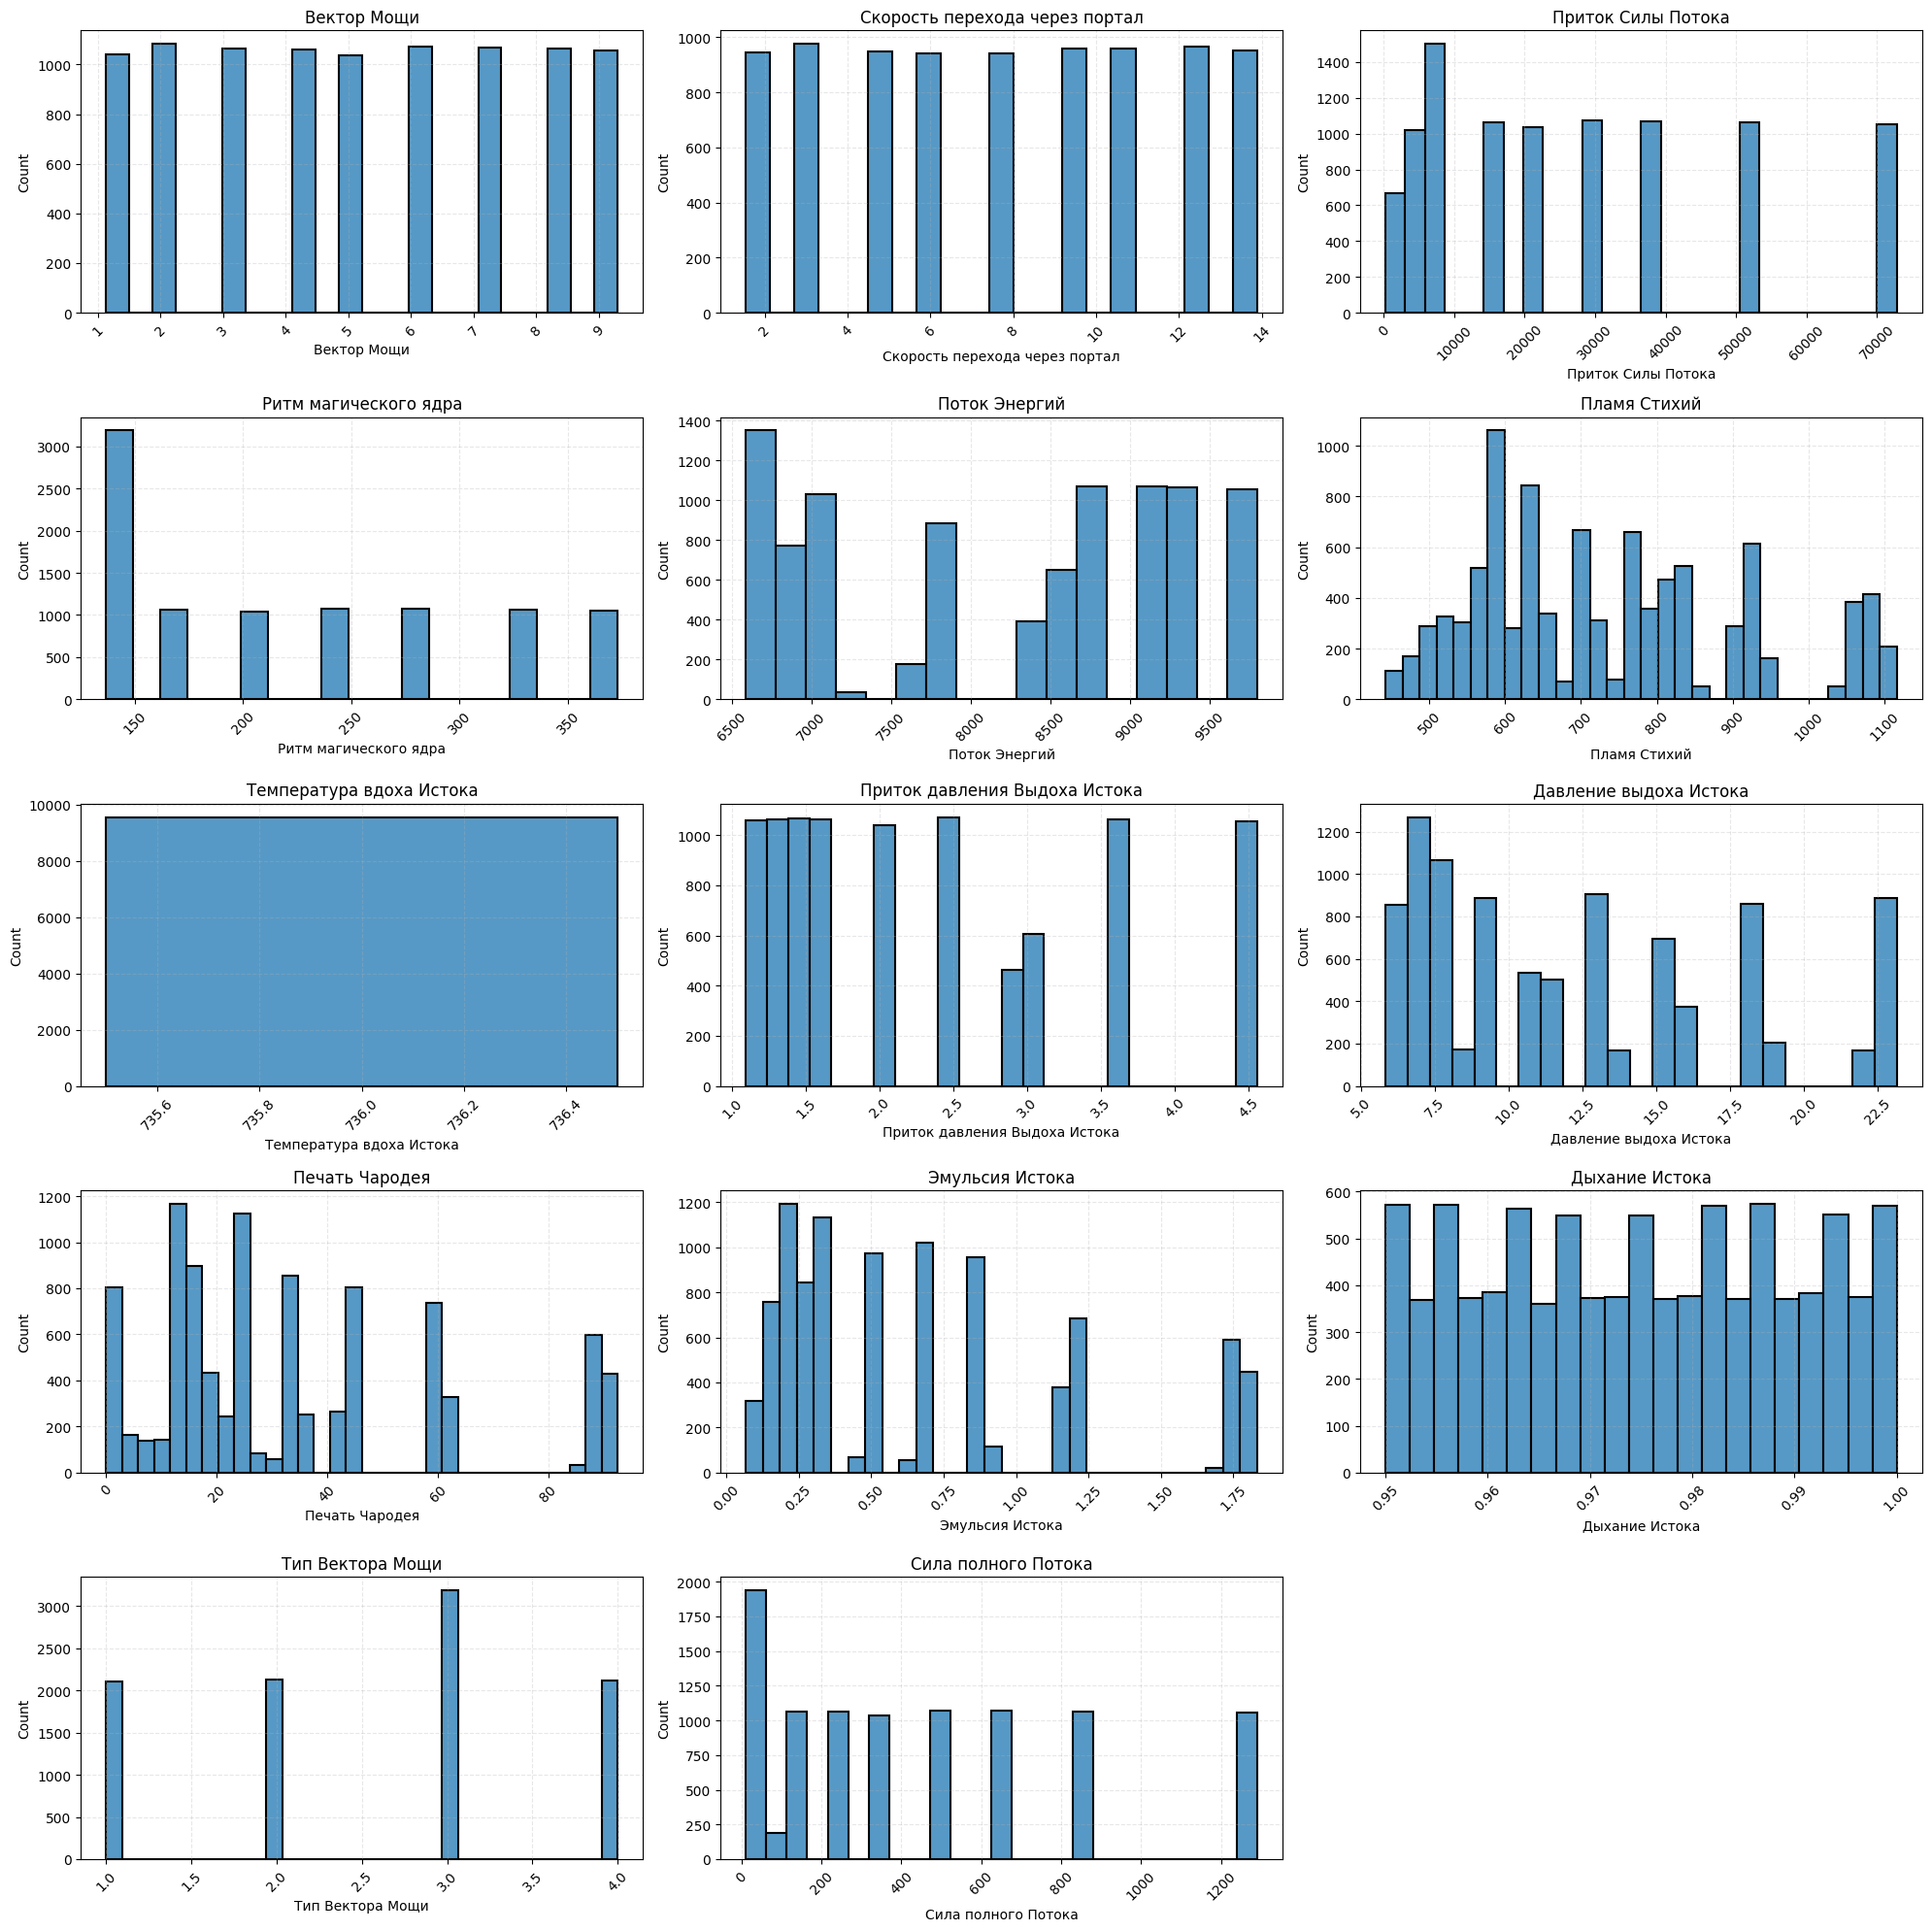


Диаграммы 'Ящик с усами' для выявления выбросов:


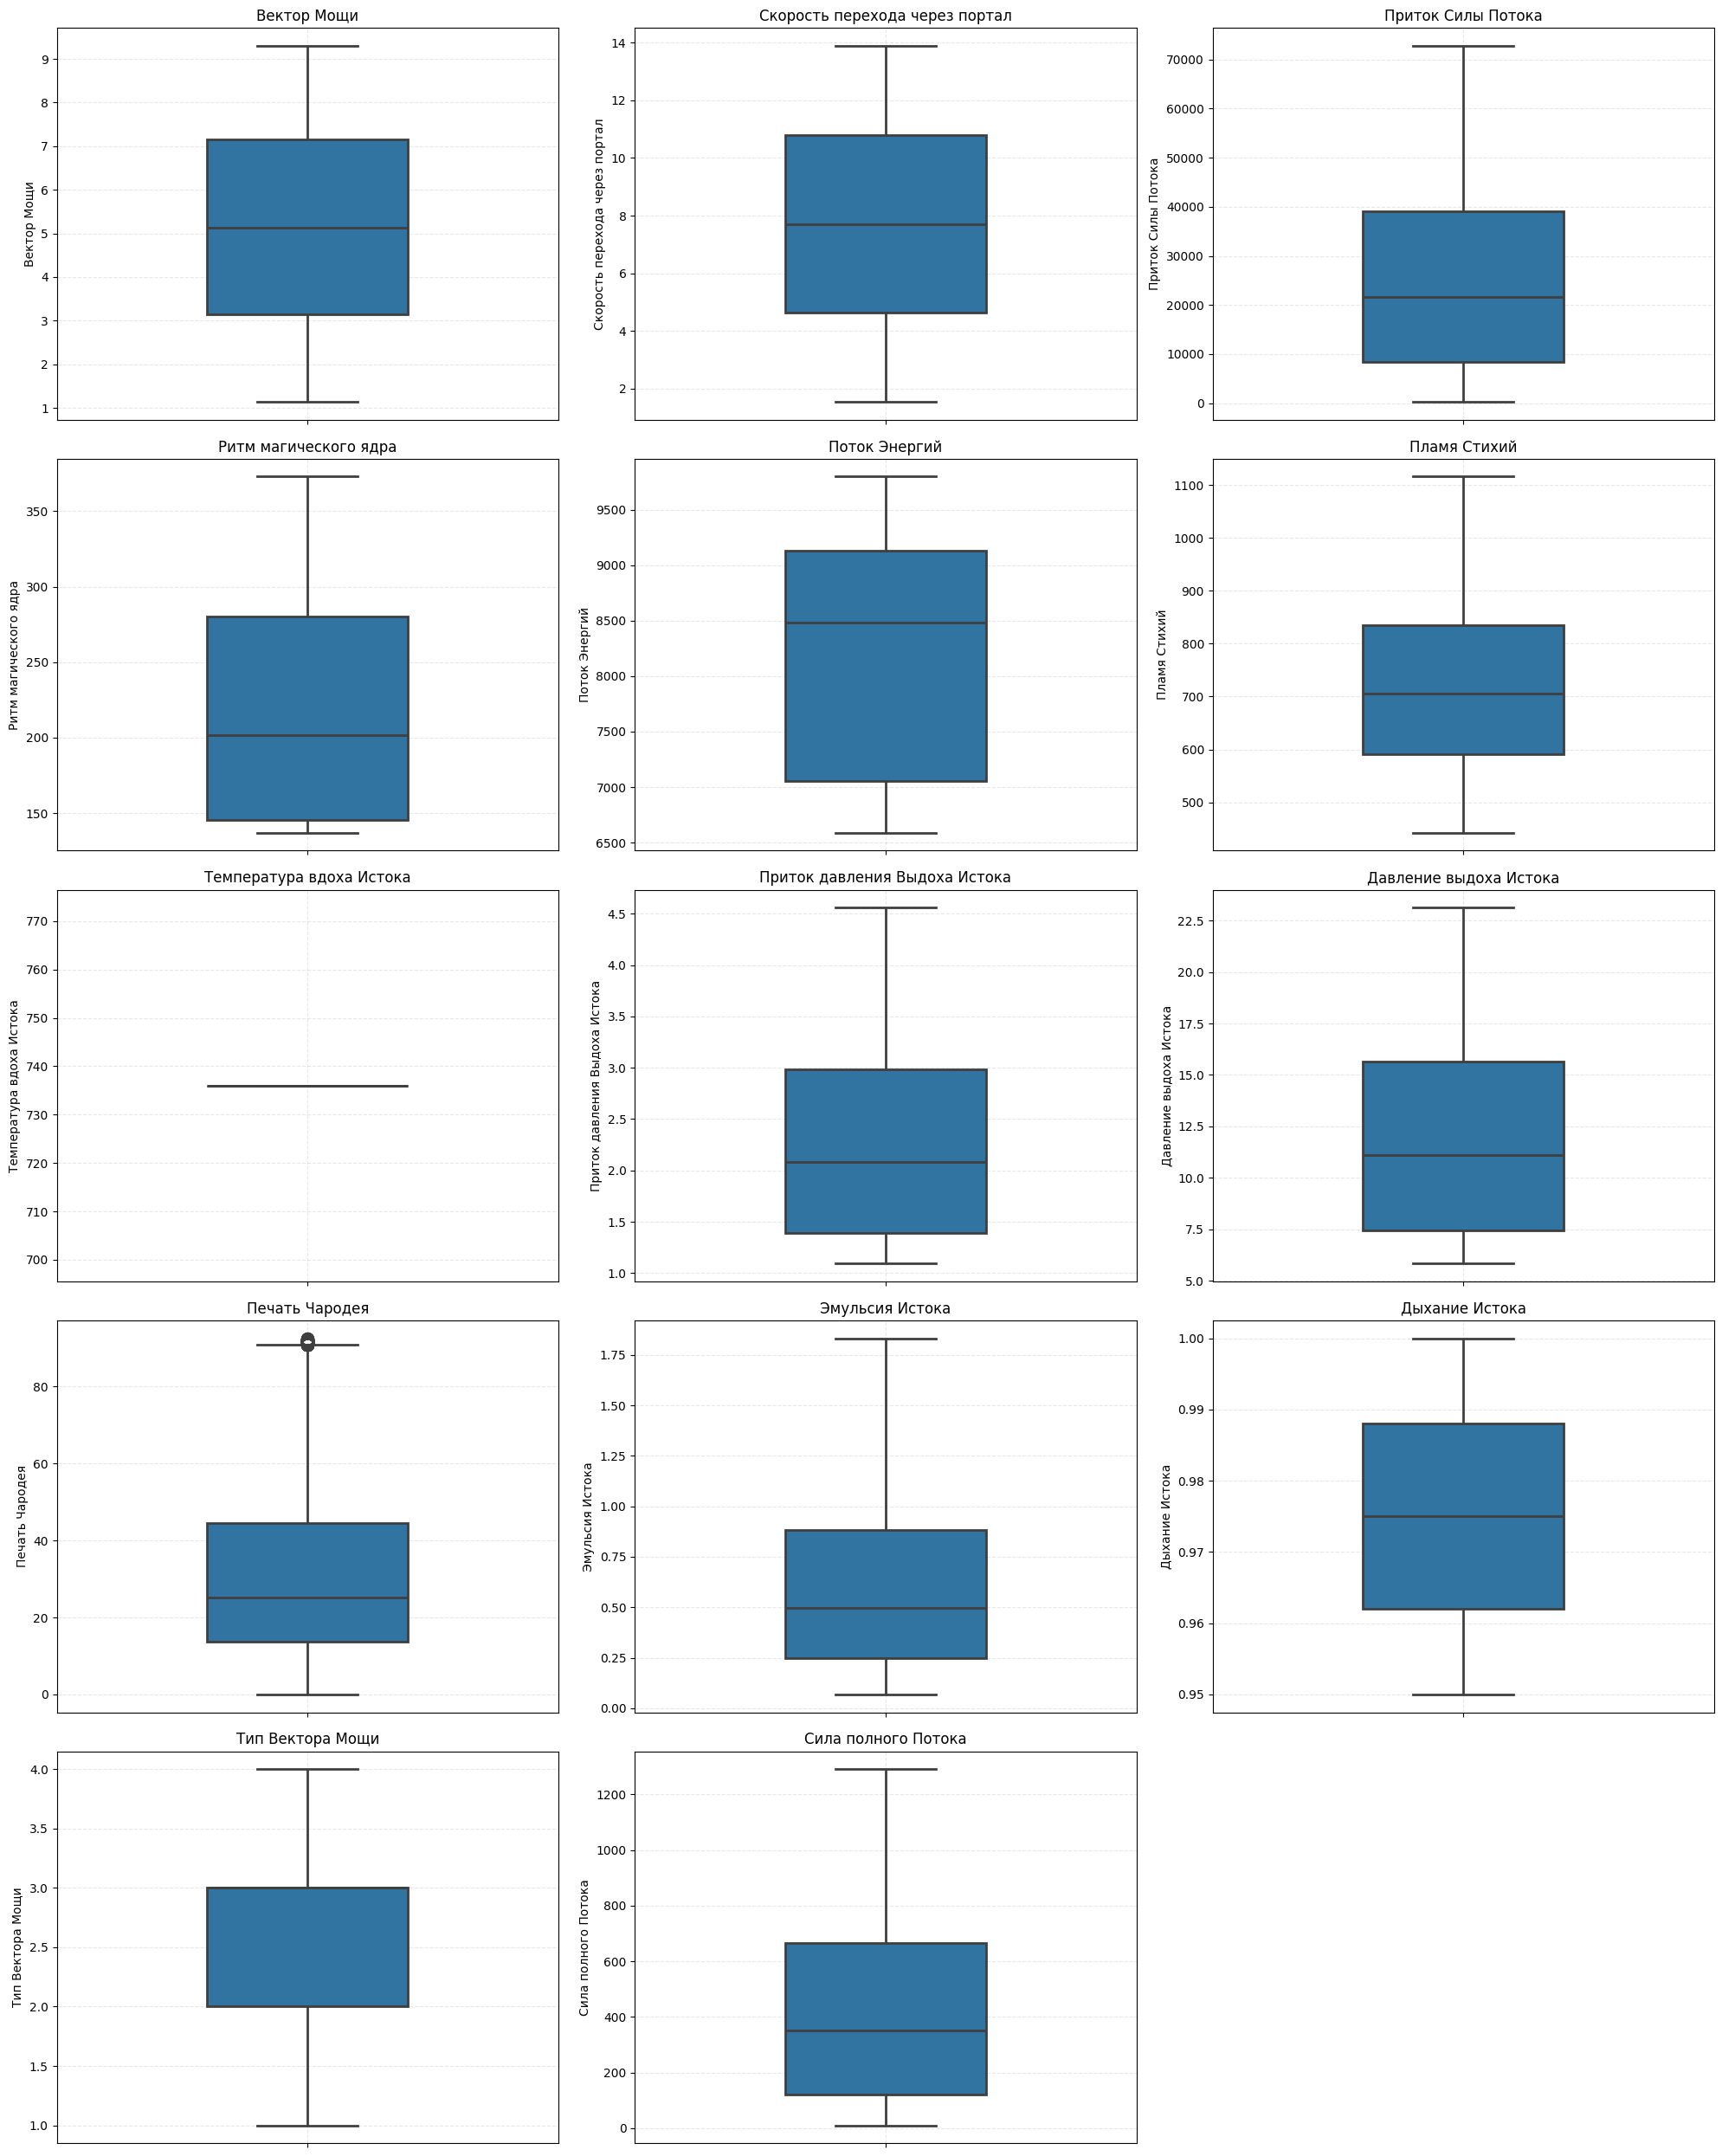

In [155]:
def draw_sns(data, visualization_function, figsize=(20, 20), **kwargs):
    n_col = 3
    n = len(data.columns)
    n_row = int(np.ceil(n / n_col))
    
    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(data.columns):
        if visualization_function == sns.boxplot:
            visualization_function(y=data[col], ax=axes[i], **kwargs)
        else:
            visualization_function(x=data[col], ax=axes[i], **kwargs)
        
        axes[i].set_title(col, fontsize=12)
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)
        axes[i].grid(True, alpha=0.3, linestyle='--')
    
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("\nГистограммы распределений признаков:")
draw_sns(
    X_train.select_dtypes(include=[np.number]), 
    sns.histplot, 
    figsize=(20, 20),
    alpha=1,
    edgecolor='black',
    linewidth=1.5,
    color='#5799c6'
)

print("\nДиаграммы 'Ящик с усами' для выявления выбросов:")
draw_sns(
    train_knn.select_dtypes(include=[np.number]), 
    sns.boxplot, 
    figsize=(20, 25),
    color='#3274a1',
    saturation=1,
    width=0.4,
    fliersize=10,
    linewidth=2
)

Функция для нахождения выбросов с помощью IQR

In [156]:
def check_feature_outliers_iqr(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((x < lower_bound) | (x > upper_bound)).values

С помощью Zscore

In [157]:
def check_feature_outliers_robust_zscore(x, threshold=3):
    median = np.median(x)
    mad = np.median(np.abs(x - median))
    
    if mad == 0:
        mad = np.std(x)
        if mad == 0:
            return np.zeros(len(x), dtype=bool)
    
    robust_z_scores = 0.6745 * (x - median) / mad
    return (np.abs(robust_z_scores) > threshold).values

Функция поиска объектов с выбросами

In [158]:
def check_dataset_outliers(data, outliers_method, **kwargs):
    outliers_flags = []
    for column in data.select_dtypes(include=[np.number]).columns:
        outliers_flags.append(outliers_method(data[column], **kwargs))
    
    return np.any(np.array(outliers_flags), axis=0)

Функция для вывода выбросов в виде диаграммы

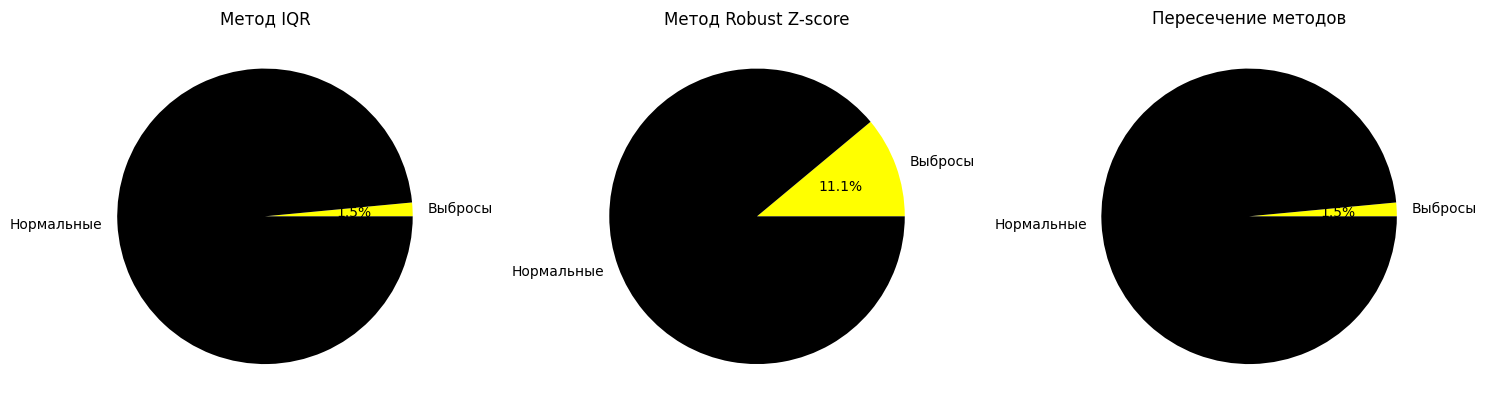

Объектов с выбросами (IQR): 143
Объектов с выбросами (Robust Z-score): 1055
Объектов с выбросами (пересечение): 143
WAKA WAKA


In [159]:
outliers_iqr = check_dataset_outliers(train_knn, check_feature_outliers_iqr)
outliers_robust = check_dataset_outliers(train_knn, check_feature_outliers_robust_zscore, threshold=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

iqr_counts = [np.sum(outliers_iqr), len(outliers_iqr) - np.sum(outliers_iqr)]
axes[0].pie(iqr_counts, labels=['Выбросы', 'Нормальные'], autopct='%1.1f%%', colors = {"yellow","black"})
axes[0].set_title('Метод IQR')

robust_counts = [np.sum(outliers_robust), len(outliers_robust) - np.sum(outliers_robust)]
axes[1].pie(robust_counts, labels=['Выбросы', 'Нормальные'], autopct='%1.1f%%', colors = {"yellow","black"})
axes[1].set_title('Метод Robust Z-score')

intersection_outliers = outliers_iqr & outliers_robust
intersection_counts = [np.sum(intersection_outliers), len(intersection_outliers) - np.sum(intersection_outliers)]
axes[2].pie(intersection_counts, labels=['Выбросы', 'Нормальные'], autopct='%1.1f%%', colors = {"yellow","black"})
axes[2].set_title('Пересечение методов')

plt.tight_layout()
plt.show()

print(f"Объектов с выбросами (IQR): {np.sum(outliers_iqr)}")
print(f"Объектов с выбросами (Robust Z-score): {np.sum(outliers_robust)}")
print(f"Объектов с выбросами (пересечение): {np.sum(intersection_outliers)}")
print("WAKA WAKA")

In [160]:
outlier_indices = train_knn[intersection_outliers].index
print(list(outlier_indices)[:20])

X_train_no_outliers = train_knn.drop(index=outlier_indices).copy()
y_train_no_outliers = y_train.drop(index=outlier_indices).copy()

print(f"\nРазмеры данных после удаления выбросов:")
print(f"Обучающая выборка: {X_train_no_outliers.shape}")
print(f"Целевая переменная: {y_train_no_outliers.shape}")

[764, 1709, 242, 4688, 539, 512, 1673, 1205, 1286, 1934, 4004, 2150, 3077, 4238, 2582, 962, 3788, 2645, 2843, 1718]

Размеры данных после удаления выбросов:
Обучающая выборка: (9404, 14)
Целевая переменная: (9404, 1)


Для поиска аномалий нужн уменьшить масштаб.

Поиск выполняется тремя алгоритмами

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from umap import UMAP

In [162]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_no_outliers.select_dtypes(include=[np.number]))
umap_reducer = UMAP(n_components=2, random_state=42)
X_2d = umap_reducer.fit_transform(X_scaled)

def draw_anomaly(X_2d, anomaly_mask):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=20, c='blue', label='Нормальные')
    plt.scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], c='red', marker='x', s=100, linewidth=2, label='Аномалии')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def draw_anomaly_pie(anomaly_mask, title=""):
    normal_count = np.sum(~anomaly_mask)
    anomaly_count = np.sum(anomaly_mask)
    
    labels = ['Нормальные объекты', 'Аномалии']
    sizes = [normal_count, anomaly_count]
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=[f'{normal_count}\n({normal_count/len(anomaly_mask)*100:.0f}%)', f'{anomaly_count}\n({anomaly_count/len(anomaly_mask)*100:.0f}%)'], autopct='', colors=['lightblue', 'lightcoral'])
    plt.title(f'{title}\nВсего объектов: {len(anomaly_mask)}', fontsize=14, pad=20)
    plt.legend(labels, loc='lower right')
    plt.tight_layout()
    plt.show()

IsolationForest

Isolation Forest обнаружено аномалий: 941


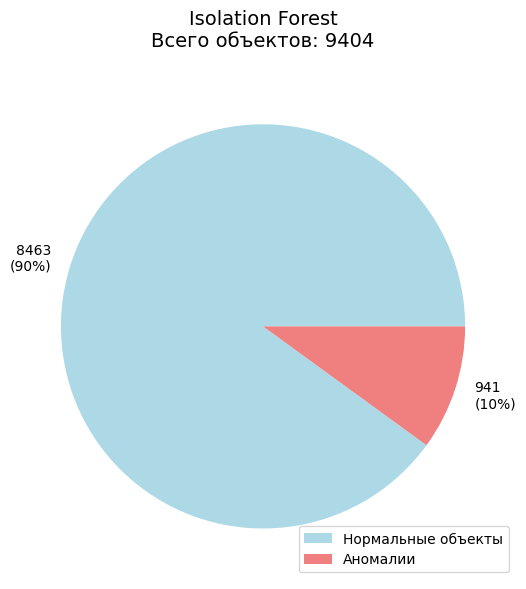

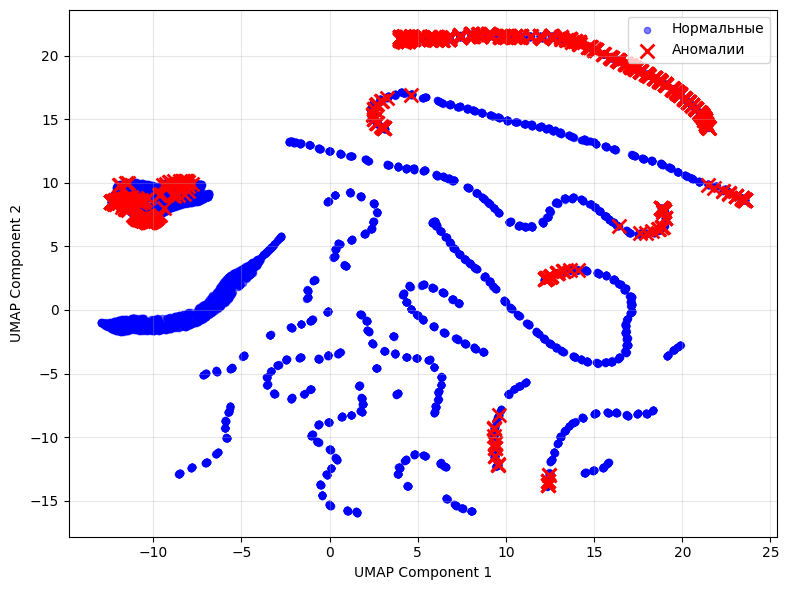

In [163]:

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_predictions = iso_forest.fit_predict(X_scaled)
iso_anomaly_mask = iso_predictions == -1

print(f"Isolation Forest обнаружено аномалий: {np.sum(iso_anomaly_mask)}")
draw_anomaly_pie(iso_anomaly_mask, "Isolation Forest")
draw_anomaly(X_2d, iso_anomaly_mask)

OneClassSVM

One-Class SVM обнаружено аномалий: 942


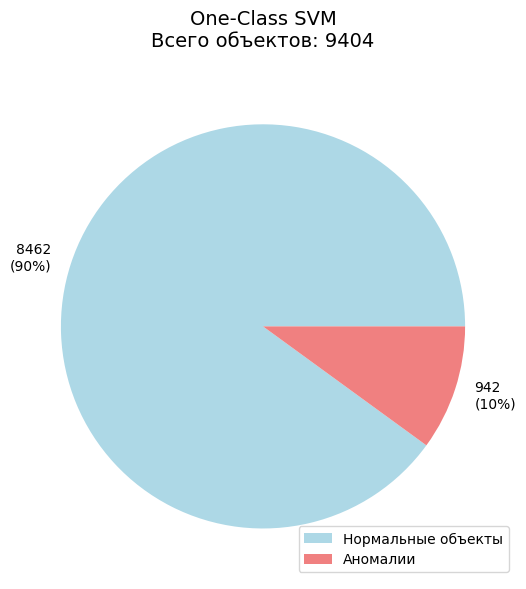

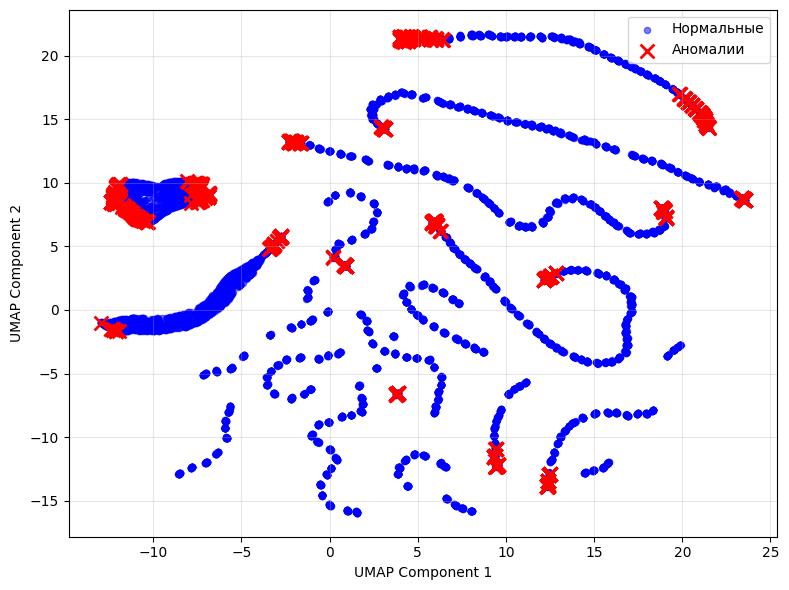

In [164]:
oc_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
oc_svm_predictions = oc_svm.fit_predict(X_scaled)
oc_svm_anomaly_mask = oc_svm_predictions == -1

print(f"One-Class SVM обнаружено аномалий: {np.sum(oc_svm_anomaly_mask)}")
draw_anomaly_pie(oc_svm_anomaly_mask, "One-Class SVM")
draw_anomaly(X_2d, oc_svm_anomaly_mask)

DBSCAN

DBSCAN обнаружено аномалий: 10


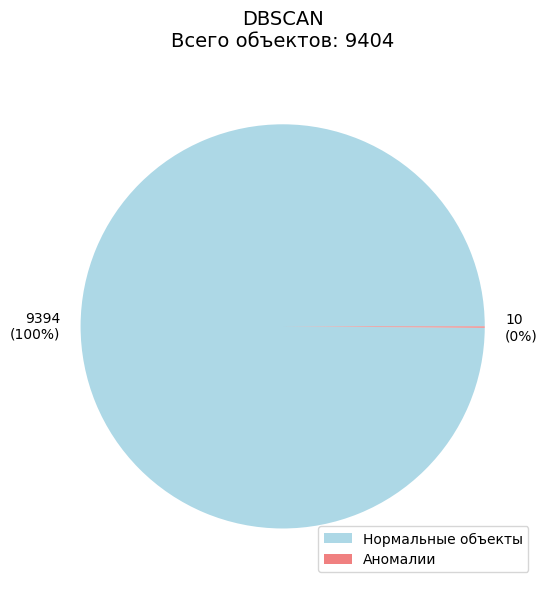

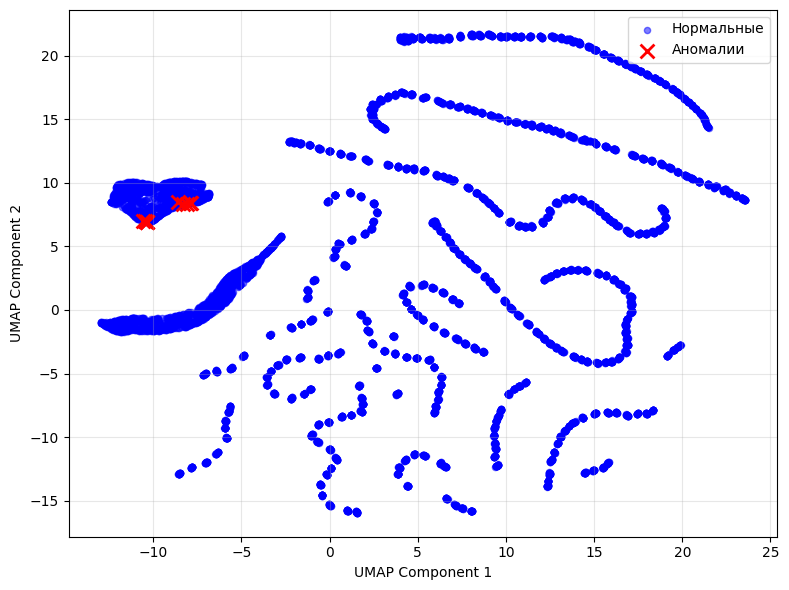

In [165]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_anomaly_mask = dbscan_labels == -1

print(f"DBSCAN обнаружено аномалий: {np.sum(dbscan_anomaly_mask)}")
draw_anomaly_pie(dbscan_anomaly_mask, "DBSCAN")
draw_anomaly(X_2d, dbscan_anomaly_mask)

Нужно объединить вс е что получили 

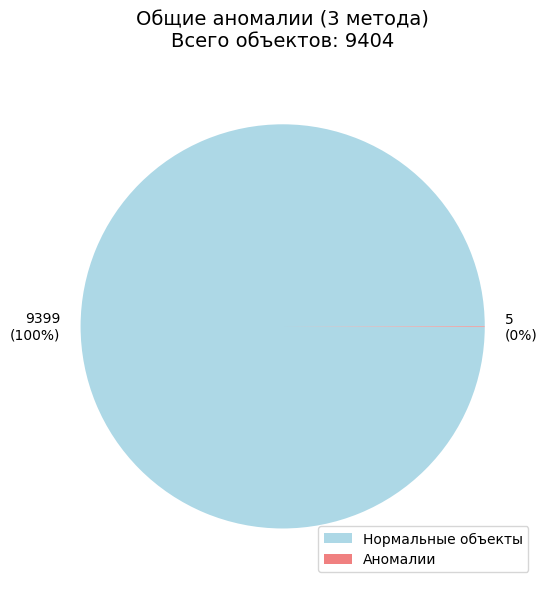

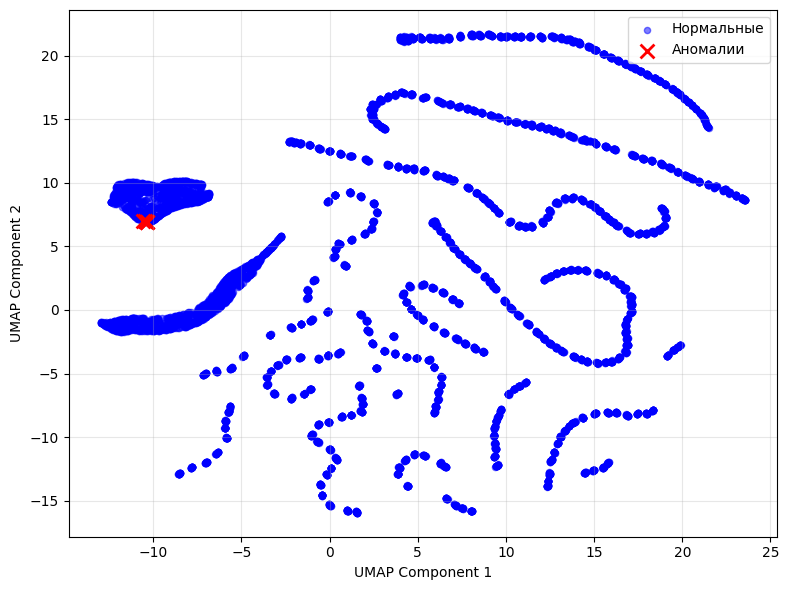

In [166]:
anomaly_masks = np.array([iso_anomaly_mask, oc_svm_anomaly_mask, dbscan_anomaly_mask])
common_anomaly_mask = np.all(anomaly_masks, axis=0)

draw_anomaly_pie(common_anomaly_mask, "Общие аномалии (3 метода)")
draw_anomaly(X_2d, common_anomaly_mask)

еще раз выведем прошлые графики, а такэе прочие графики

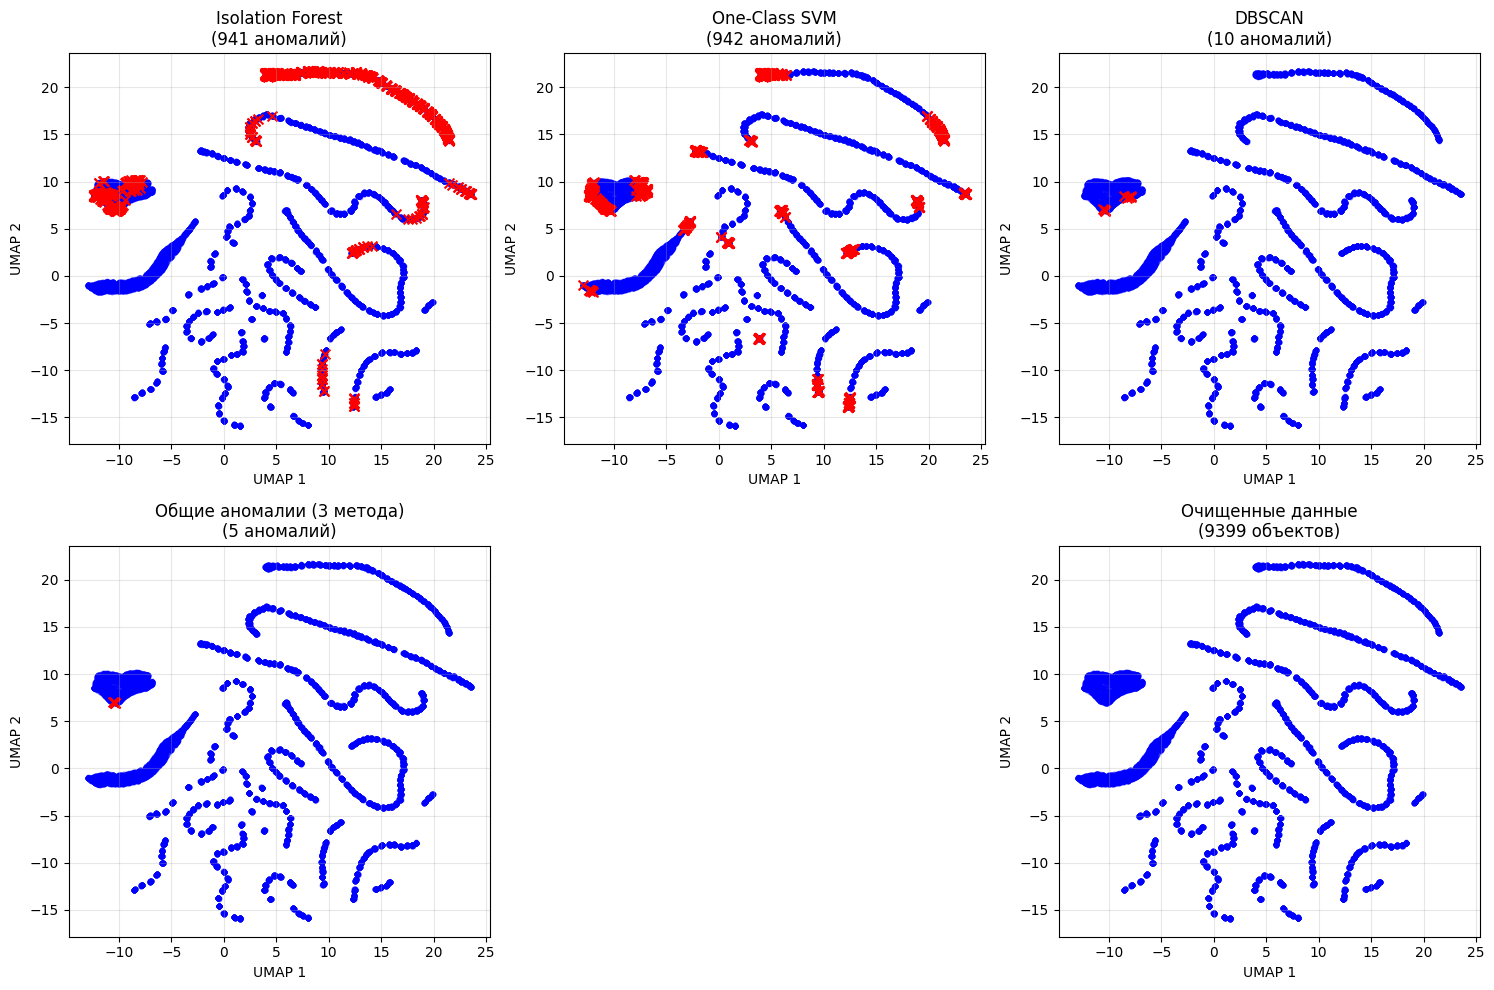

In [167]:
plt.figure(figsize=(15, 10))

# График 1: Isolation Forest
plt.subplot(2, 3, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=10, c='blue')
plt.scatter(X_2d[iso_anomaly_mask, 0], X_2d[iso_anomaly_mask, 1], c='red', marker='x', s=50)
plt.title(f'Isolation Forest\n({np.sum(iso_anomaly_mask)} аномалий)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, alpha=0.3)

# График 2: One-Class SVM
plt.subplot(2, 3, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=10, c='blue')
plt.scatter(X_2d[oc_svm_anomaly_mask, 0], X_2d[oc_svm_anomaly_mask, 1], c='red', marker='x', s=50)
plt.title(f'One-Class SVM\n({np.sum(oc_svm_anomaly_mask)} аномалий)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, alpha=0.3)

# График 3: DBSCAN
plt.subplot(2, 3, 3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=10, c='blue')
plt.scatter(X_2d[dbscan_anomaly_mask, 0], X_2d[dbscan_anomaly_mask, 1], c='red', marker='x', s=50)
plt.title(f'DBSCAN\n({np.sum(dbscan_anomaly_mask)} аномалий)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, alpha=0.3)

# График 4: Общие аномалии
plt.subplot(2, 3, 4)
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5, s=10, c='blue')
plt.scatter(X_2d[common_anomaly_mask, 0], X_2d[common_anomaly_mask, 1], c='red', marker='x', s=50)
plt.title(f'Общие аномалии (3 метода)\n({np.sum(common_anomaly_mask)} аномалий)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, alpha=0.3)

# График 5: Финал - очищенные данные
plt.subplot(2, 3, 6)
X_clean_2d = X_2d[~common_anomaly_mask]
plt.scatter(X_clean_2d[:, 0], X_clean_2d[:, 1], alpha=0.5, s=10, c='blue')
plt.title(f'Очищенные данные\n({len(X_clean_2d)} объектов)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [184]:
anomaly_indices = X_train_no_outliers.index[common_anomaly_mask]
X_train_clean = X_train_no_outliers.drop(index=anomaly_indices).copy()
y_train_clean = y_train_no_outliers.drop(index=anomaly_indices).copy()

initial_size = len(train_knn)
outliers_removed = len(outlier_indices)
anomalies_removed = len(anomaly_indices)
final_size = len(X_train_clean)

print(f"{'Начальный размер обучающей выборки:'} {initial_size}")
print(f"{'Удалено объектов с выбросами (IQR & Robust Z):'} {outliers_removed}")
print(f"{'Удалено аномальных объектов (3 метода):'} {anomalies_removed}")
print(f"{'Итоговый размер обучающей выборки:'} {final_size}")
print(f"{'Всего удалено объектов:'} {initial_size - final_size}")
print(f"{'Процент удаленных данных:'} {(initial_size - final_size)/initial_size*100:.2f}%")

Начальный размер обучающей выборки: 9547
Удалено объектов с выбросами (IQR & Robust Z): 143
Удалено аномальных объектов (3 метода): 5
Итоговый размер обучающей выборки: 9399
Всего удалено объектов: 148
Процент удаленных данных: 1.55%


Лабораторная работа номер 5

Выведем хитмап (поскольку все значения - численные, просто все со всеми глянем)

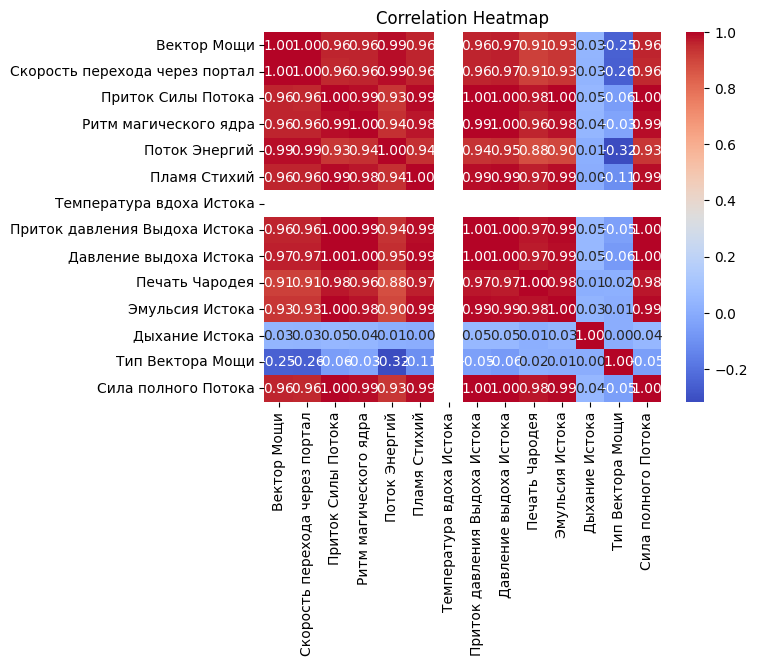

In [169]:
sns.heatmap(X_train_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


![alt text](image.png)

Силы левого и правого потоков мы уже объединили до этого (упс) но теперь мы к нему схлопнем приток силы потока

Не совсем уверен как именно их надо совместить - пожалуй просто сложу их вместе

In [170]:
data['Мощность Потока'] = data['Сила полного Потока'] + data['Приток Силы Потока']

Общая сила ядра получится из произведения ритма маг ядра и притока силы потока

In [171]:
data['Общая Сила Ядра'] = data['Ритм магического ядра'] * data['Приток Силы Потока']

Общее давление на выходе = приток давления... + давление ...

In [172]:
data['Общее давление выдоха Истока'] = data['Приток давления Выдоха Истока'] + data['Давление выдоха Истока']

Все остальное также добавляем согласно картинке (Используя формулы прикладной области, которые были даны в описании задачи из ЛР №2,...)

Маг. производительность - показатель эффективности поддерания топливом скорости перехода (уффффф)

In [173]:
data['Магическая производительность'] = data['Скорость перехода через портал'] / data['Эмульсия Истока']

In [174]:
data['Эффективность Ядра'] = data['Общая Сила Ядра'] / data['Эмульсия Истока']

In [175]:
data['Магическая Мощность'] = data['Эмульсия Истока'] * data['Общее давление выдоха Истока'] * (data['Пламя Стихий'] - data['Температура вдоха Истока'])

In [176]:
data['Степень износа источников'] = data['Дыхание Истока'] / data['Гармония Бессмертия']

In [177]:
data['Расхождение в стабильности магии'] = abs(data['Дыхание Истока'] - data['Гармония Бессмертия'])

In [178]:
data['Баланс угасания'] = data['Расхождение в стабильности магии'] / data['Скорость перехода через портал']

In [179]:
data.describe()

Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
count  11934.000000                    10731.000000        11934.000000   
mean       5.166667                        7.721490        27247.498685   
std        2.626388                        3.993642        22148.613155   
min        1.138000                        1.543320          253.547000   
25%        3.144000                        4.629960         8375.883750   
50%        5.140000                        7.716600        21630.659000   
75%        7.148000                       10.803240        39001.426750   
max        9.300000                       13.889880        72784.872000   

       Ритм магического ядра  Поток Энергий  Пламя Стихий  \
count           11934.000000   11934.000000  11934.000000   
mean              223.711688    8200.947312    735.495446   
std                81.061874    1091.315507    173.680552   
min               136.939406    6589.002000    442.364000   
25%               145.220958    7058.324000    589.872750   
50%               201.514947    8482.081500    706.038000   
75%               280.447777    9132.606000    834.066250   
max               372.879926    9797.103000   1115.797000   

       Температура вдоха Истока  Приток давления Выдоха Истока  \
count                   11934.0                   11934.000000   
mean                      736.0                       2.352963   
std                         0.0                       1.084770   
min                       736.0                       1.093000   
25%                       736.0                       1.389000   
50%                       736.0                       2.083000   
75%                       736.0                       2.981000   
max                       736.0                       4.560000   

       Давление выдоха Истока  Печать Чародея  ...  Сила полного Потока  \
count            11934.000000    11934.000000  ...         11934.000000   
mean                12.297123       33.641261  ...           454.671536   
std                  5.337448       25.841363  ...           400.991779   
min                  5.828000        0.000000  ...            10.608000   
25%                  7.447250       13.677500  ...           120.634000   
50%                 11.092000       25.276500  ...           350.536000   
75%                 15.658000       44.552500  ...           664.729500   
max                 23.140000       92.556000  ...          1290.498000   

       Мощность Потока  Общая Сила Ядра  Общее давление выдоха Истока  \
count     11934.000000     1.193400e+04                  11934.000000   
mean      27702.170222     7.872392e+06                     14.650086   
std       22549.280662     8.488915e+06                      6.421678   
min         267.547000     3.556916e+04                      6.924000   
25%        8496.517500     1.216337e+06                      8.837000   
50%       21981.202000     4.358900e+06                     13.175000   
75%       39666.143750     1.093774e+07                     18.635000   
max       74075.284000     2.714001e+07                     27.700000   

       Магическая производительность  Эффективность Ядра  Магическая Мощность  \
count                   10731.000000        1.193400e+04         11934.000000   
mean                       13.801483        8.777894e+06          2412.538034   
std                         4.261459        4.404463e+06          5195.129730   
min                         4.593214        4.373923e+05          -398.760862   
25%                        10.401483        4.924213e+06          -297.002796   
50%                        13.617529        8.785057e+06          -174.280740   
75%                        17.841850        1.272738e+07          1601.715773   
max                        25.094634        1.592358e+07         19001.277332   

       Степень износа источников  Расхождение в стабильности магии  \
count               11934.000000                     

In [200]:
le = LabelEncoder()
data['Тип Вектора Мощи'] = le.fit_transform(data['Тип Вектора Мощи']) + 1

Не туда добавил емае


In [187]:
def additional_columns(X_1,y_1):
    X = X_1.copy()
    y = y_1.copy()
    X['Мощность Потока'] = X['Сила полного Потока'] + X['Приток Силы Потока']
    X['Общая Сила Ядра'] = X['Ритм магического ядра'] * X['Приток Силы Потока']
    X['Общее давление выдоха Истока'] = X['Приток давления Выдоха Истока'] + X['Давление выдоха Истока']
    X['Магическая производительность'] = X['Скорость перехода через портал'] / X['Эмульсия Истока']
    X['Эффективность Ядра'] = X['Общая Сила Ядра'] / X['Эмульсия Истока']
    X['Магическая Мощность'] = X['Эмульсия Истока'] * X['Общее давление выдоха Истока'] * (X['Пламя Стихий'] - X['Температура вдоха Истока'])
    X['Степень износа источников'] = X['Дыхание Истока'] / y['Гармония Бессмертия']
    X['Расхождение в стабильности магии'] = abs(X['Дыхание Истока'] - y['Гармония Бессмертия'])
    X['Баланс угасания'] = X['Расхождение в стабильности магии'] / X['Скорость перехода через портал']
    return X, y

In [ ]:
X_train_extended, y_train_extended = additional_columns(X_train_clean, y_train_clean)

In [190]:
X_train_extended

Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
352          2.088                         3.08664            5644.773   
4452         7.148                        10.80324           38994.155   
7551         1.138                         1.54332            3844.937   
666          1.138                         1.54332             836.107   
956          3.144                         4.62996            8378.986   
...            ...                             ...                 ...   
10977        7.148                        10.80324           39001.931   
7503         7.148                        10.80324           39003.548   
668          3.144                         4.62996            8381.216   
11472        7.148                        10.80324           39019.753   
4535         9.300                        13.88988           72768.359   

       Ритм магического ядра  Поток Энергий  Пламя Стихий  \
352               141.152805       6841.866       596.417   
4452              280.445683       9122.998       841.811   
7551              139.609341       6620.534       572.109   
666               143.840857       6745.224       462.910   
956               145.220749       7107.726       602.464   
...                      ...            ...           ...   
10977             280.445473       9121.753       800.910   
7503              280.442227       9117.280       832.116   
668               145.222110       7164.169       587.161   
11472             280.428299       9108.835       822.173   
4535              372.844949       9763.510      1085.744   

       Температура вдоха Истока  Приток давления Выдоха Истока  \
352                       736.0                          1.284   
4452                      736.0                          2.976   
7551                      736.0                          1.223   
666                       736.0                          1.119   
956                       736.0                          1.389   
...                         ...                            ...   
10977                     736.0                          2.981   
7503                      736.0                          2.984   
668                       736.0                          1.387   
11472                     736.0                          2.997   
4535                      736.0                          4.510   

       Давление выдоха Истока  Печать Чародея  ...  Сила полного Потока  \
352                     6.941          22.742  ...               46.044   
4452                   15.742          45.202  ...              664.648   
7551                    6.646          24.704  ...               13.182   
666                     5.957           0.000  ...               17.838   
956                     7.561          12.949  ...              120.700   
...                       ...             ...  ...                  ...   
10977                  15.440          42.399  ...              664.610   
7503                   15.768          44.660  ...              664.730   
668                     7.415          12.310  ...              120.760   
11472                  15.842          44.155  ...              665.182   
4535                   22.688          90.107  ...             1289.614   

       Мощность Потока  Общая Сила Ядра  Общее давление выдоха Истока  \
352           5690.817     7.967755e+05                         8.225   
4452         39658.803     1.093574e+07                        18.718   
7551          3858.119     5.367891e+05                         7.869   
666            853.945     1.202663e+05                         7.076   
956           8499.686     1.216803e+06                         8.950   
...                ...              ...                           ...   
10977        39666.541     1.093791e+07                        18.421   
7503         39668.278     1.093824e+07                        18.752   
668           8501.976     1.21713

In [191]:
y_train_extended

Гармония Бессмертия
352                  0.988
4452                 0.975
7551                 0.982
666                  0.997
956                  0.977
...                    ...
10977                0.998
7503                 0.976
668                  0.997
11472                0.975
4535                 0.984

[9399 rows x 1 columns]

In [189]:
X_test_extended, y_test_extended = additional_columns(X_test, y_test)

In [192]:
X_test_extended

Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
3843         1.138                         1.54332            1543.859   
10900        2.088                             NaN            6782.446   
5430         4.161                         6.17328           14720.969   
4752         1.138                         1.54332            6138.930   
8302         5.140                         7.71660           21627.337   
...            ...                             ...                 ...   
122          6.175                         9.25992           29796.753   
9440         9.300                        13.88988           72763.303   
850          5.140                         7.71660           21638.392   
11244        4.161                         6.17328           14716.654   
8315         9.300                        13.88988           72768.670   

       Ритм магического ядра  Поток Энергий  Пламя Стихий  \
3843              146.003005       6700.711       485.386   
10900             142.645795       6755.951       600.800   
5430              162.049109       7749.968       646.295   
4752              139.248791       6647.234       640.772   
8302              201.514738       8472.226       701.291   
...                      ...            ...           ...   
122               241.616749       8841.830       785.938   
9440              372.841912       9738.873      1063.563   
850               201.516414       8506.469       714.182   
11244             162.047433       7687.551       638.627   
8315              372.843588       9748.932      1064.589   

       Температура вдоха Истока  Приток давления Выдоха Истока  \
3843                      736.0                          1.151   
10900                     736.0                          1.325   
5430                      736.0                          1.661   
4752                      736.0                          1.290   
8302                      736.0                          2.086   
...                         ...                            ...   
122                       736.0                          2.497   
9440                      736.0                          4.538   
850                       736.0                          2.075   
11244                     736.0                          1.667   
8315                      736.0                          4.526   

       Давление выдоха Истока  Печать Чародея  ...  Сила полного Потока  \
3843                    6.187           0.000  ...               20.186   
10900                   7.148          16.312  ...               51.142   
5430                    8.983          17.471  ...              227.526   
4752                    7.033          27.487  ...               12.888   
8302                   11.113          24.863  ...              350.480   
...                       ...             ...  ...                  ...   
122                    13.177          34.816  ...              492.594   
9440                   22.854          88.590  ...             1289.924   
850                    11.019          25.404  ...              350.658   
11244                   9.044          17.194  ...              227.446   
8315                   22.686          88.444  ...             1290.166   

       Мощность Потока  Общая Сила Ядра  Общее давление выдоха Истока  \
3843          1564.045     2.254081e+05                         7.338   
10900         6833.588     9.674874e+05                         8.473   
5430         14948.495     2.385520e+06                        10.644   
4752          6151.818     8.548386e+05                         8.323   
8302         21977.817     4.358227e+06                        13.199   
...                ...              ...                           ...   
122          30289.347     7.199395e+06                        15.674   
9440         74053.227     2.712921e+07                        27.392   
850          21989.050     4.36049

In [193]:
y_test_extended

Гармония Бессмертия
3843                 0.986
10900                0.990
5430                 0.980
4752                 0.983
8302                 0.987
...                    ...
122                  0.988
9440                 0.983
850                  0.991
11244                0.976
8315                 0.988

[2387 rows x 1 columns]

чет ниче не понятно

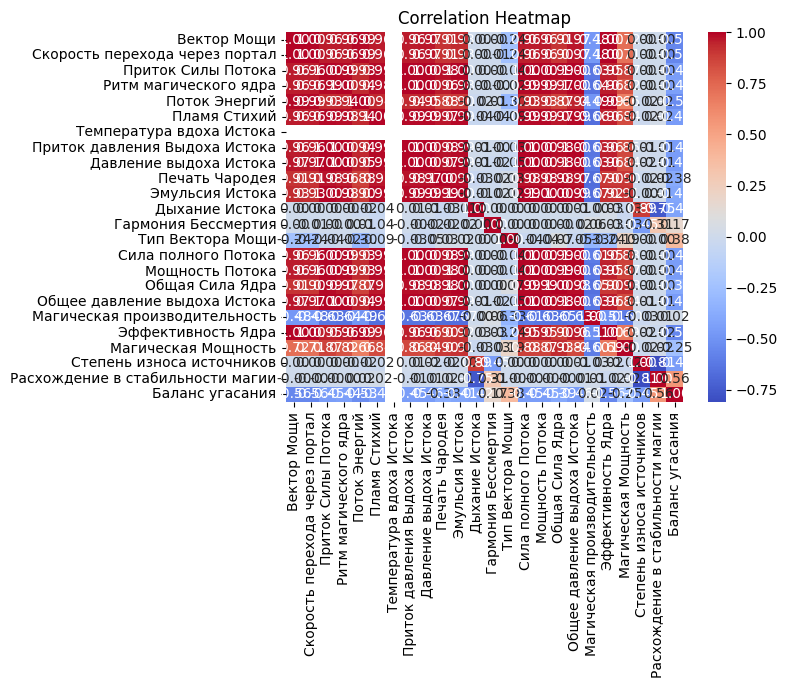

In [201]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Так вроде корреляция есть

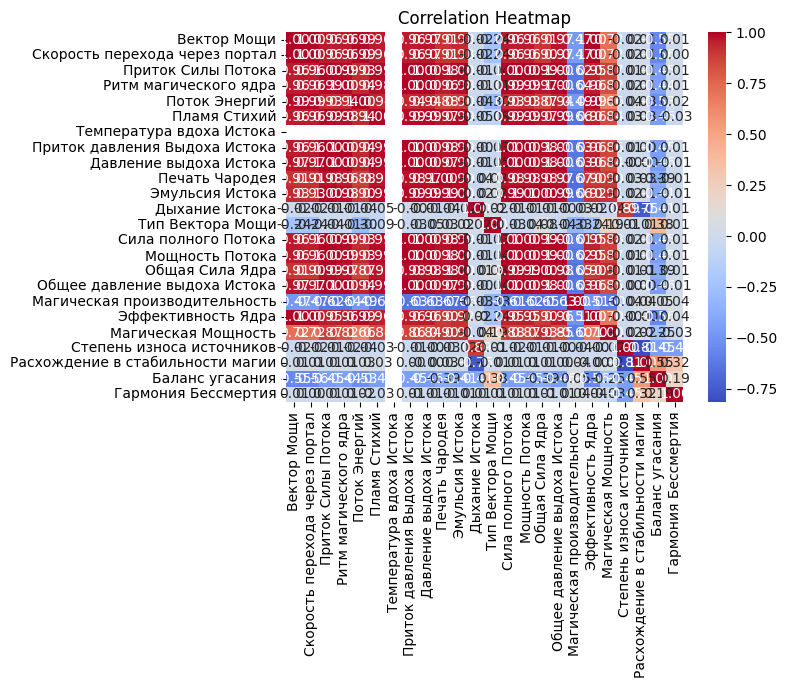

In [199]:
sns.heatmap(pd.concat([X_test_extended, y_test_extended], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

А если по кускам сделать то нет корреляции

In [202]:
X_test_extended.describe()

Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
count  2387.000000                     2143.000000         2387.000000   
mean      5.158014                        7.718761        27242.598474   
std       2.637512                        4.014166        22249.147619   
min       1.138000                        1.543320          268.738000   
25%       3.144000                        4.629960         8375.924000   
50%       5.140000                        7.716600        21630.641000   
75%       7.148000                       10.803240        39002.129000   
max       9.300000                       13.889880        72784.872000   

       Ритм магического ядра  Поток Энергий  Пламя Стихий  \
count            2387.000000    2387.000000   2387.000000   
mean              223.633456    8201.190956    735.287318   
std                81.189037    1092.290914    174.788716   
min               137.080149    6589.002000    448.299000   
25%               145.220853    7057.484500    588.634500   
50%               201.514843    8482.547000    706.048000   
75%               280.447672    9132.327000    833.127000   
max               372.879821    9794.991000   1113.705000   

       Температура вдоха Истока  Приток давления Выдоха Истока  \
count                    2387.0                    2387.000000   
mean                      736.0                       2.352555   
std                         0.0                       1.088696   
min                       736.0                       1.093000   
25%                       736.0                       1.389000   
50%                       736.0                       2.082000   
75%                       736.0                       2.982000   
max                       736.0                       4.558000   

       Давление выдоха Истока  Печать Чародея  ...  Сила полного Потока  \
count             2387.000000     2387.000000  ...          2387.000000   
mean                12.294316       33.659938  ...           454.750816   
std                  5.354694       25.968539  ...           402.772518   
min                  5.832000        0.000000  ...            10.692000   
25%                  7.452500       13.586500  ...           120.636000   
50%                 11.090000       25.263000  ...           350.534000   
75%                 15.651500       44.464000  ...           664.733000   
max                 23.112000       92.369000  ...          1290.412000   

       Мощность Потока  Общая Сила Ядра  Общее давление выдоха Истока  \
count      2387.000000     2.387000e+03                   2387.000000   
mean      27697.349290     7.879433e+06                     14.646871   
std       22651.582592     8.538681e+06                      6.442854   
min         282.352000     3.760445e+04                      6.928000   
25%        8496.556000     1.216343e+06                      8.842500   
50%       21981.203000     4.358930e+06                     13.173000   
75%       39666.932000     1.093793e+07                     18.631500   
max       74075.284000     2.714001e+07                     27.670000   

       Магическая производительность  Эффективность Ядра  Магическая Мощность  \
count                    2143.000000        2.387000e+03          2387.000000   
mean                       13.781182        8.762536e+06          2441.018012   
std                         4.292628        4.415284e+06          5251.785460   
min                         4.634595        4.373923e+05          -397.282518   
25%                        10.379624        4.944523e+06          -296.028711   
50%                        13.617529        8.753376e+06          -175.278323   
75%                        17.688481        1.271663e+07          1576.850530   
max                        24.497143        1.588642e+07         18840.856065   

       Степень износа источников  Расхождение в стабильности магии  \
count                2387.000000                       2387.0